In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from scipy.interpolate import interp1d
%matplotlib inline

['00:00', '00:20', '00:40', '01:00', '01:20', '01:40', '02:00', '02:20', '02:40', '03:00', '03:20', '03:40', '04:00', '04:20']


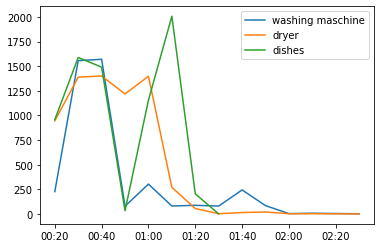

In [15]:
consumption = {}
washing = [226.27333333333334, 1556.3512500000002, 1570.1, 78.38625, 302.69222222222226,\
            80.462, 87.51333333333332,79.86666666666666, 243.6725, 84.29375000000002, 3.1566666666666667,\
            6.928888888888888, 4.215000000000001, 1.6989999999999998]
dryer = [944.8970000000002, 1388.957, 1400.4070000000002, 1218.1022222222223, 1397.5260000000003, 270.133,\
        54.658, 2.1729999999999996, 14.029, 19.621111111111116, 2.102222222222222, 2.0955555555555554,\
         1.2679999999999998, 0.135]
dishes = [957.1955555555555, 1588.2400000000002, 1490.19, 32.480000000000004, 1154.9522222222222, 2006.9719999999998,\
          203.91099999999997, 0.42125]
consumption['dryer'] = np.array(dryer)/(1000*1000)*10  # /(10^6)(MW->W)*10(minutes)
consumption['dish_washer'] = np.array(dishes)/(1000*1000)*10 
consumption['washing_maschine'] = np.array(washing)/(1000*1000)*10 

max_time_index = max(len(washing), len(dryer), len(dishes))
x_Axes = [indexToTime(i*2) for i in range(max_time_index)]
print(x_Axes)

fig,ax = plt.subplots()
ax.set_xticklabels(x_Axes)
ax.plot(washing, label ='washing maschine')
ax.plot(dryer, label ='dryer')
ax.plot(dishes, label = 'dishes')

ax.legend()

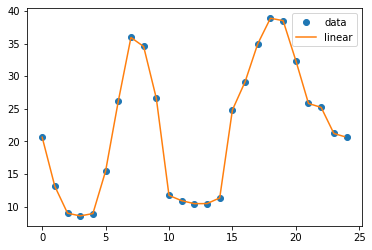

(144,)


In [16]:
price_list = [20.64, 13.11, 9.00, 8.58, 8.94, 15.44, 26.14, 35.93, 34.55, 26.62, 11.73, 10.91, 10.46, 10.47,\
              11.34, 24.81, 29.14, 34.96, 38.88, 38.51, 32.40, 25.82, 25.21, 21.22, 20.64]
x = np.linspace(0, 24, num=25, endpoint=True)
y = price_list
linear_prices = interp1d(x, y)

xnew = np.linspace(0, 24, num=24*6, endpoint=False)
plt.plot(x, y, 'o', xnew, linear_prices(xnew), '-')
plt.legend(['data', 'linear'], loc='best')
plt.show()
prices = linear_prices(xnew)
print(np.shape(prices))

In [2]:
# available data: dict with average comsumtion load curve of dryer, washing maschine, dish washer in 10 min steps
# engergy prizes in 10 minutes steps
def calculateCost(start_index, end_index, device_key):
    runtime_steps = len(consumption[device_key])
    assert end_index - start_index >= runtime_steps
    latest_start_index = end_index - runtime_steps
    time_steps = (latest_start_index - start_index) +1
    results = np.zeros(time_steps)
    
    for i in range(time_steps):
        temp_start_index = start_index + i
        temp_sum = 0
        for j in range(runtime_steps):
            temp_sum = temp_sum + consumption[device_key][j]*prices[temp_start_index + j]
        results[i] = temp_sum
        
    return start_index, results

def giveIdealTimes(start_time, result_vector):
    indexes = [i+ start_time for i, x in enumerate(result_vector) if x == min(result_vector)]
    return indexes

def timeToIndex(hour, minutes):
    assert minutes %10 == 0 and hour in range(24) and  minutes in range(60)
    index = hour*6 + minutes/10
    return int(index)

def indexToTime(index):
    hours_index = math.floor(index/6)
    hours =['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'][hours_index]
    minutes = (index - hours_index*6)*10
    if minutes == 0:
        time = hours +':00'
    else:
        time = hours +':'+str(minutes)
    return time


In [19]:
start_index = timeToIndex(8,0) # 08:20
end_index = timeToIndex(18,30) #16:30

[start_index, result] = calculateCost(start_index, end_index,'washing_maschine')
times = [indexToTime(i+start_index) for i in range(len(result))]
df = pd.DataFrame(result, index=times, columns={'Price in €'})
display(df)
ideal_indexes = giveIdealTimes(start_index, result)
#print(ideal_indexes)
time = indexToTime(ideal_indexes[0])
print('Ideal time is at '+time)


,Price in €
08:00,1.345041
08:10,1.282077
08:20,1.218343
08:30,1.151172
08:40,1.085069
08:50,1.006466
09:00,0.911683
09:10,0.816331
09:20,0.722869
09:30,0.636508


Ideal time is at 11:50
